<u><h2> Place holder for title </H2><u/>

In [2]:
library(tidyverse)
library(tidymodels)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**<u><h4>Introduction</u></h4>**

Students performance in an exam can be a determinant of their level of knowledge on any given subject. If a student has a high performance in an exam, then they can be considered to have high knowledge on the topic. However, we are not sure how preparation or pre-existing knowledge of a related topic affects a student's knowledge level on a topic.

So, through the data set of the user knowledge, which is about studen'ts knowledgefon electrical DC machines, we attempt to determine a relationship between preparation/pre-existing knowledge. The dataset contains 6 unique variables, described as:
1. Degree of study time for goal object materials (STG),
2. Degree of repetition number of user for goal object materials (SCG),
3. Degree of study time of user for related objects with goal object (STR).
4. Exam performance of user for related objects with goal object (LPR).
5. Exam performance of user for goal objects (PEG).
6. The Knowledge level of user (U)ow

Through this data set, we hope to ansrhe proposer questnio
: Giaan n observation with known STC, SCG, STR, LPR, and PEG, what is its category of SUN



**<u><h4>Preliminary exploratory data analysis</u></h4>**

In [8]:
#Import data
download.file("https://archive.ics.uci.edu/static/public/257/user+knowledge+modeling.zip",
                   destfile="Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.zip")
#Extract data from a zip file
unzip("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.zip", 
      exdir = "data")
#wrangle data
data_train<-read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet=2)|>
    select(STG:UNS)|>
    mutate(UNS=as_factor(UNS))
data_test<-read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet=3)|>
    select(STG:UNS)|>
    mutate(UNS=as_factor(UNS))|>
    mutate(UNS=fct_recode(UNS,"very_low"="Very Low"))# change the label of "Very Low" in the test dataset to "very_low"
head(data_train)
head(data_test)

New names:
• `` -> `...7`
• `` -> `...8`
New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


In [4]:
# Summarize training data grouped by difference UNS for each quantitative variable in 5 tables
data_train|>group_by(UNS)|>
    summarize("Mean of STG"=mean(STG),
             "Standard deviation of STG"=sd(STG),
             "Max of STG"=max(STG),
             "Min of STG"=min(STG))

data_train|>group_by(UNS)|>
    summarize("Mean of SCG"=mean(SCG),
             "Standard deviation of SCG"=sd(SCG),
             "Max of SCG"=max(SCG),
             "Min of SCG"=min(SCG))

data_train|>group_by(UNS)|>
    summarize("Mean of STR"=mean(STR),
             "Standard deviation of STR"=sd(STR),
             "Max of STR"=max(STR),
             "Min of STR"=min(STR))

data_train|>group_by(UNS)|>
    summarize("Mean of LPR"=mean(LPR),
             "Standard deviation of LPR"=sd(LPR),
             "Max of LPR"=max(LPR),
             "Min of LPR"=min(LPR))

data_train|>group_by(UNS)|>
    summarize("Mean of PEG"=mean(PEG),
             "Standard deviation of PEG"=sd(PEG),
             "Max of PEG"=max(PEG),
             "Min of PEG"=min(PEG))
# Summarize the number of observations of each category of UNS
data_train|>group_by(UNS)|>
    summarize("Number of users"=n())

UNS,Mean of STG,Standard deviation of STG,Max of STG,Min of STG
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.3057917,0.1872919,0.68,0.00
High,0.4216508,0.2396612,0.99,0.00
Low,0.3211446,0.1739915,0.73,0.02
Middle,0.3999773,0.2135850,0.80,0.06


UNS,Mean of SCG,Standard deviation of SCG,Max of SCG,Min of SCG
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.1981250,0.1363245,0.60,0.000
High,0.4231905,0.2340361,0.90,0.000
Low,0.3370000,0.1927264,0.85,0.010
Middle,0.3679205,0.2076783,0.85,0.015


UNS,Mean of STR,Standard deviation of STR,Max of STR,Min of STR
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.3662500,0.2184891,0.71,0.00
High,0.5016667,0.2587361,0.95,0.02
Low,0.4307229,0.2515308,0.88,0.02
Middle,0.5068182,0.2284558,0.89,0.02


UNS,Mean of LPR,Standard deviation of LPR,Max of LPR,Min of LPR
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.3587500,0.1970282,0.66,0.00
High,0.5012698,0.2772881,0.99,0.01
Low,0.4973494,0.2251400,0.98,0.04
Middle,0.3428409,0.2279088,0.88,0.02


UNS,Mean of PEG,Standard deviation of PEG,Max of PEG,Min of PEG
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.09083333,0.05633106,0.24,0.00
High,0.77253968,0.10756796,0.93,0.47
Low,0.23762651,0.07299193,0.35,0.01
Middle,0.54238636,0.12621815,0.83,0.25


UNS,Number of users
<fct>,<int>
very_low,24
High,63
Low,83
Middle,88


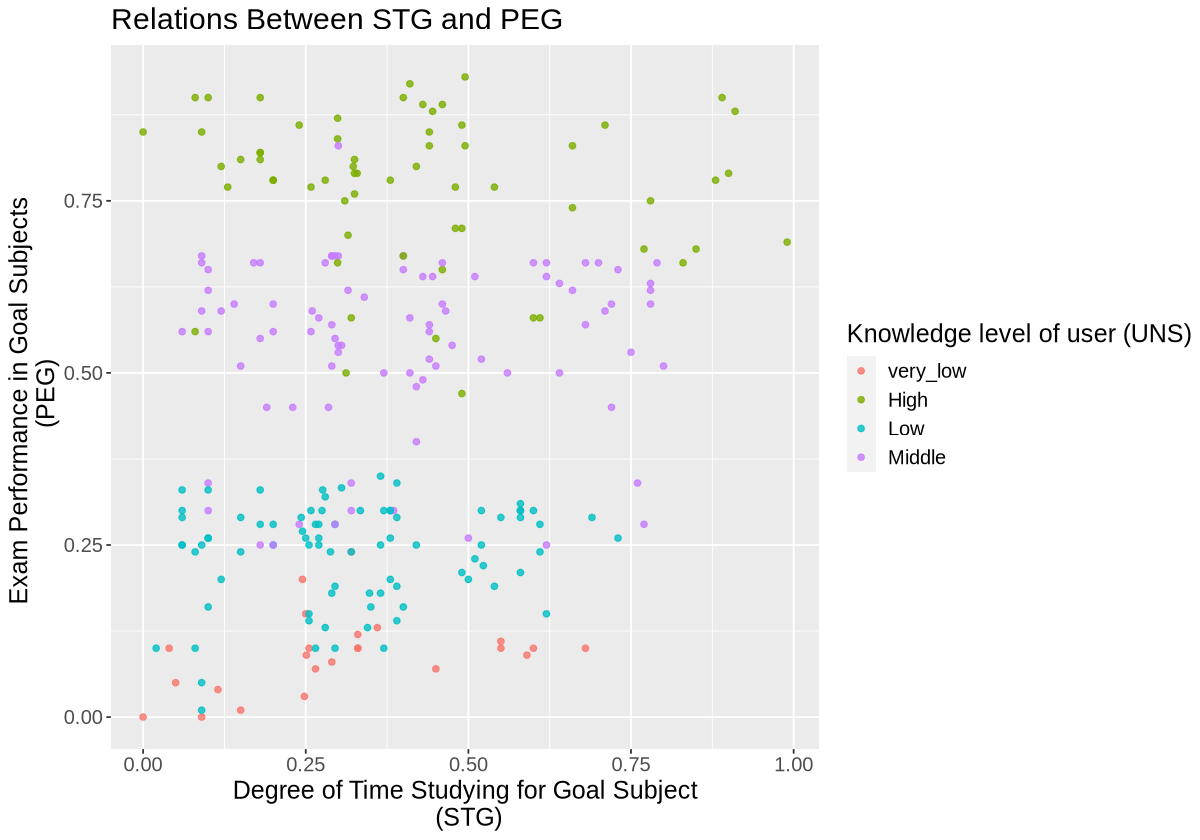

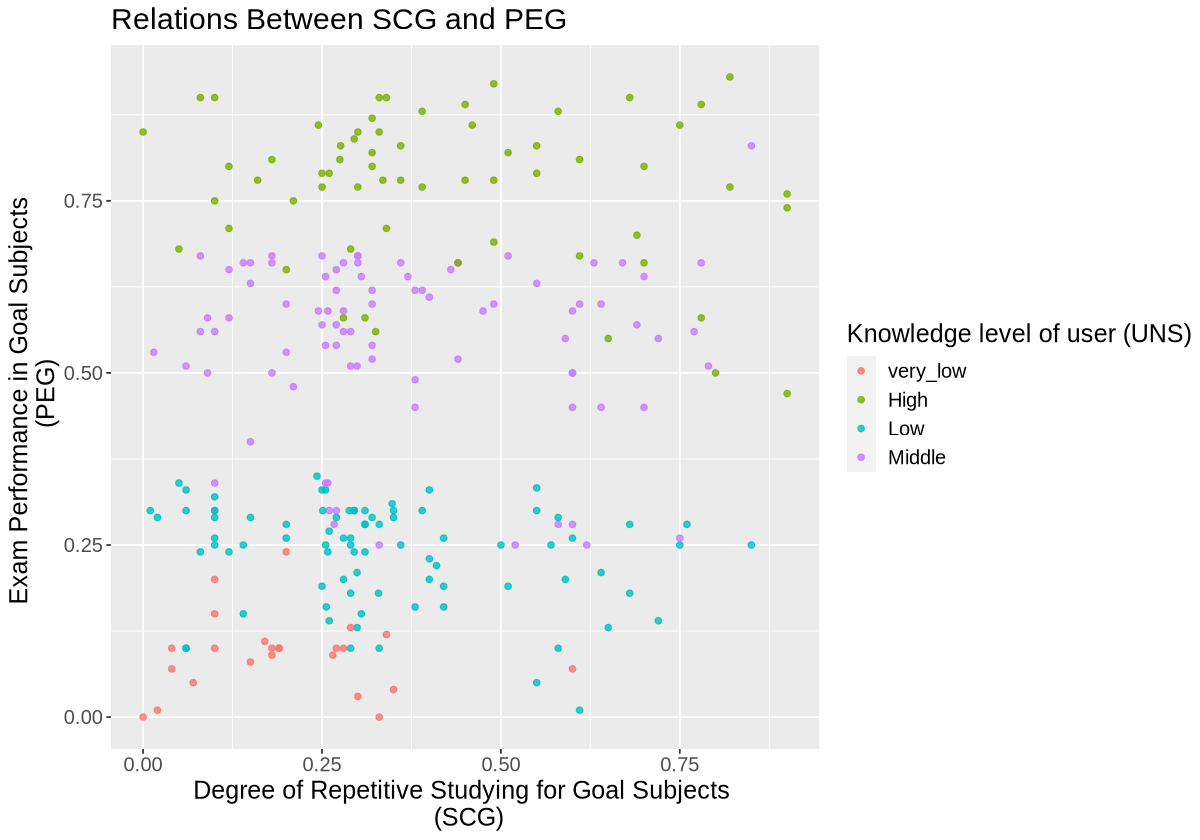

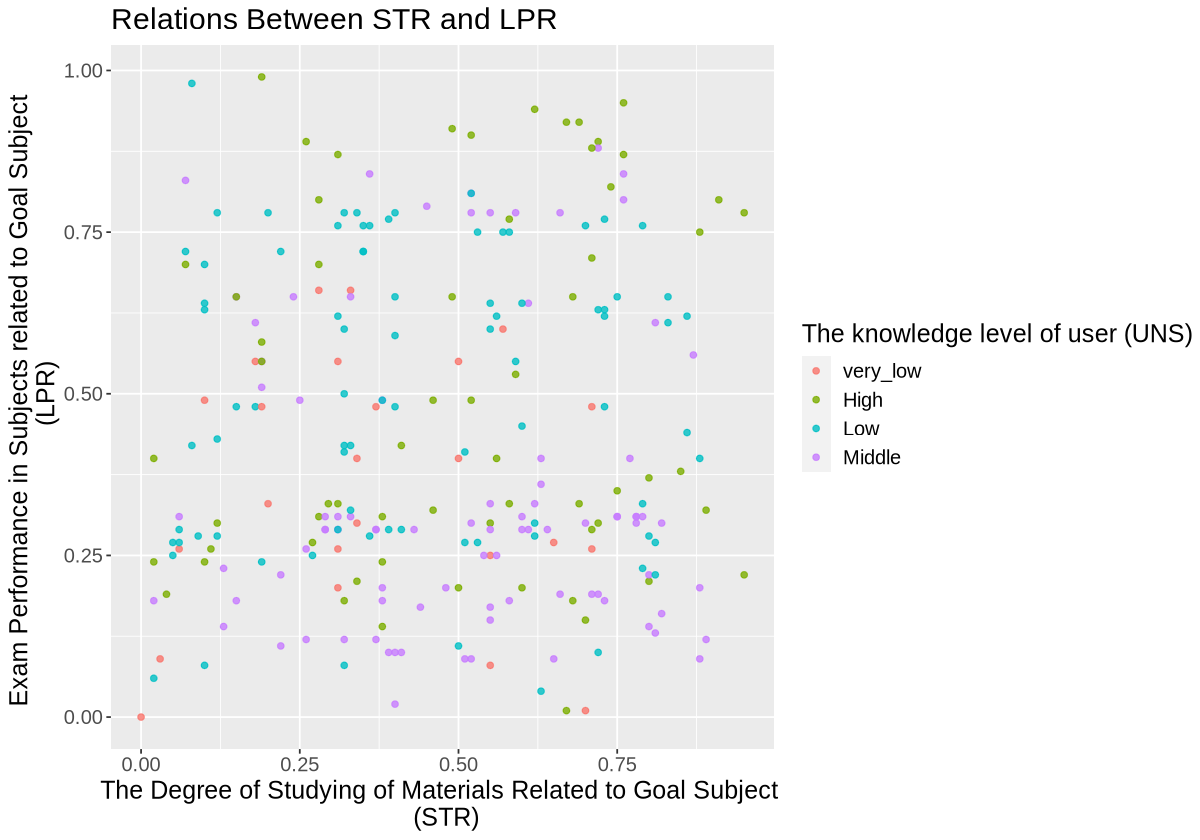

In [5]:
# Find relations between STG and PEG, between SCG and PEG, and between STR and LPR using 3 scatterplots in the training dataset.
# Use color=UNS to differentiate the UNS of each observation.
options(repr.plot.width=10,repr.plot.height=7)
plot_STG_PEG<-data_train|>ggplot(aes(x=STG,y=PEG,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Relations Between STG and PEG")+
    labs(x="Degree of Time Studying for Goal Subject\n (STG)",
        y="Exam Performance in Goal Subjects \n (PEG)",
        color="Knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_PEG

plot_SCG_PEG<-data_train|>ggplot(aes(x=SCG,y=PEG,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Relations Between SCG and PEG")+
    labs(x="Degree of Repetitive Studying for Goal Subjects \n (SCG)",
        y="Exam Performance in Goal Subjects \n (PEG)",
        color="Knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_SCG_PEG

plot_STR_LPR<-data_train|>ggplot(aes(x=STR,y=LPR,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Relations Between STR and LPR")+
    labs(x="The Degree of Studying of Materials Related to Goal Subject \n (STR)",
        y="Exam Performance in Subjects related to Goal Subject \n (LPR)",
        color="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STR_LPR

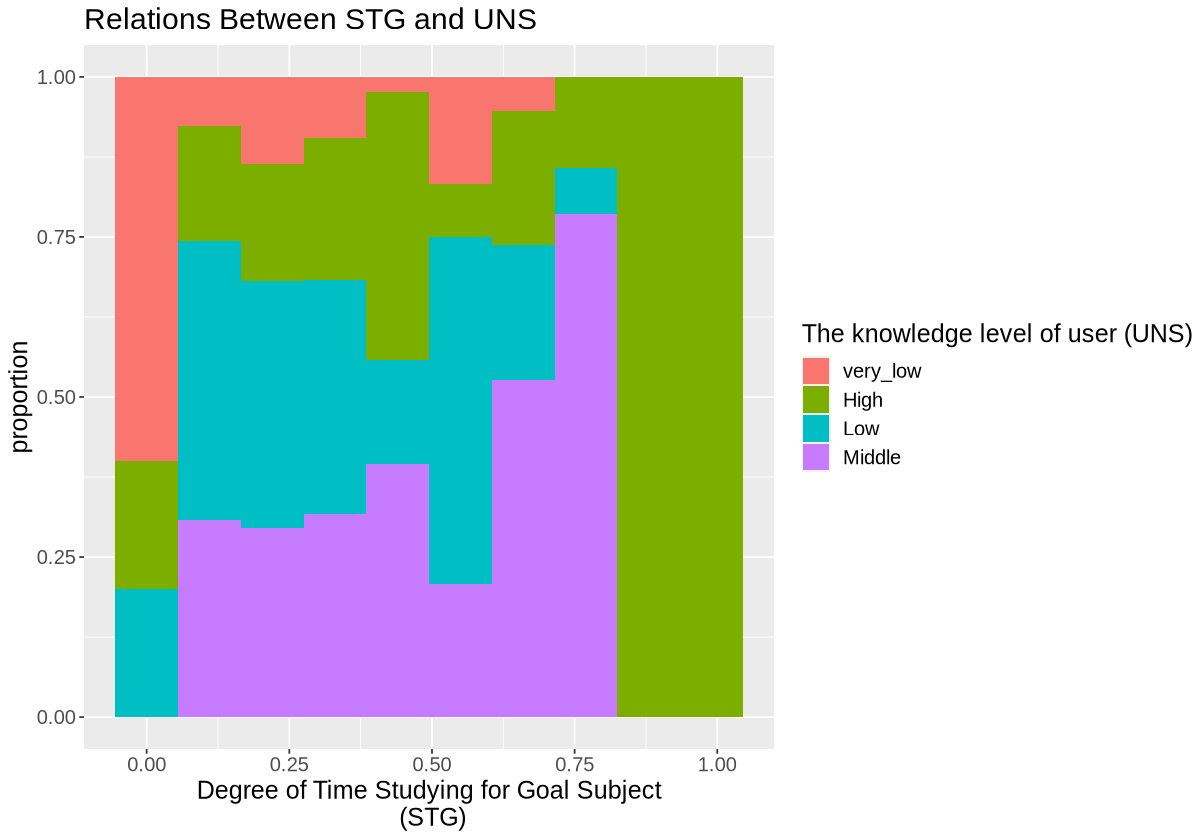

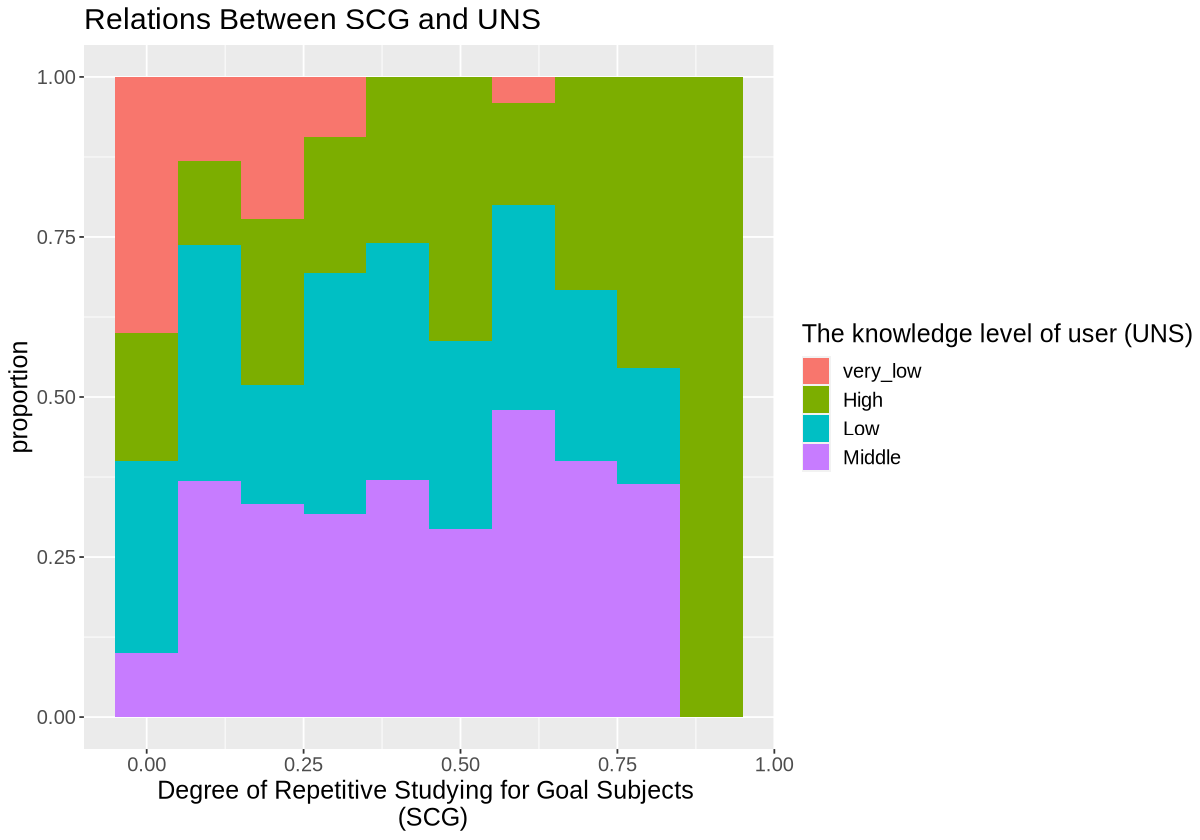

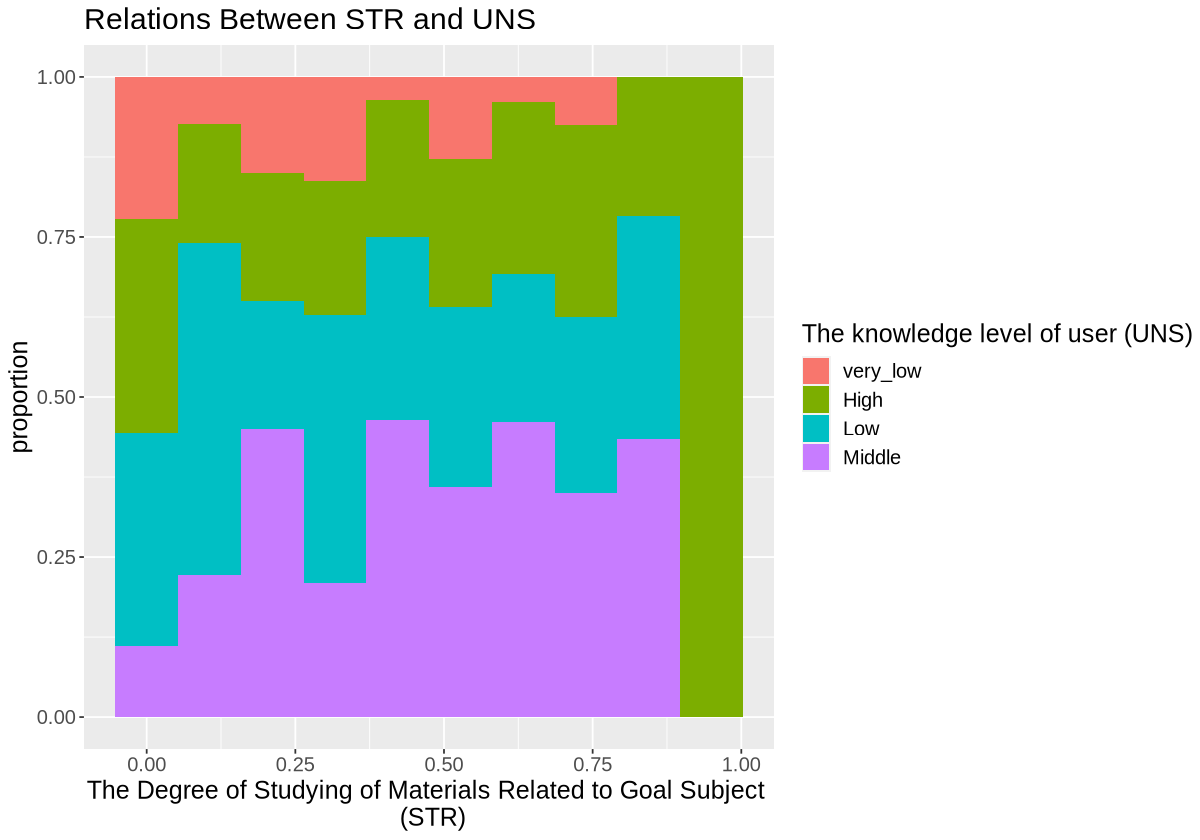

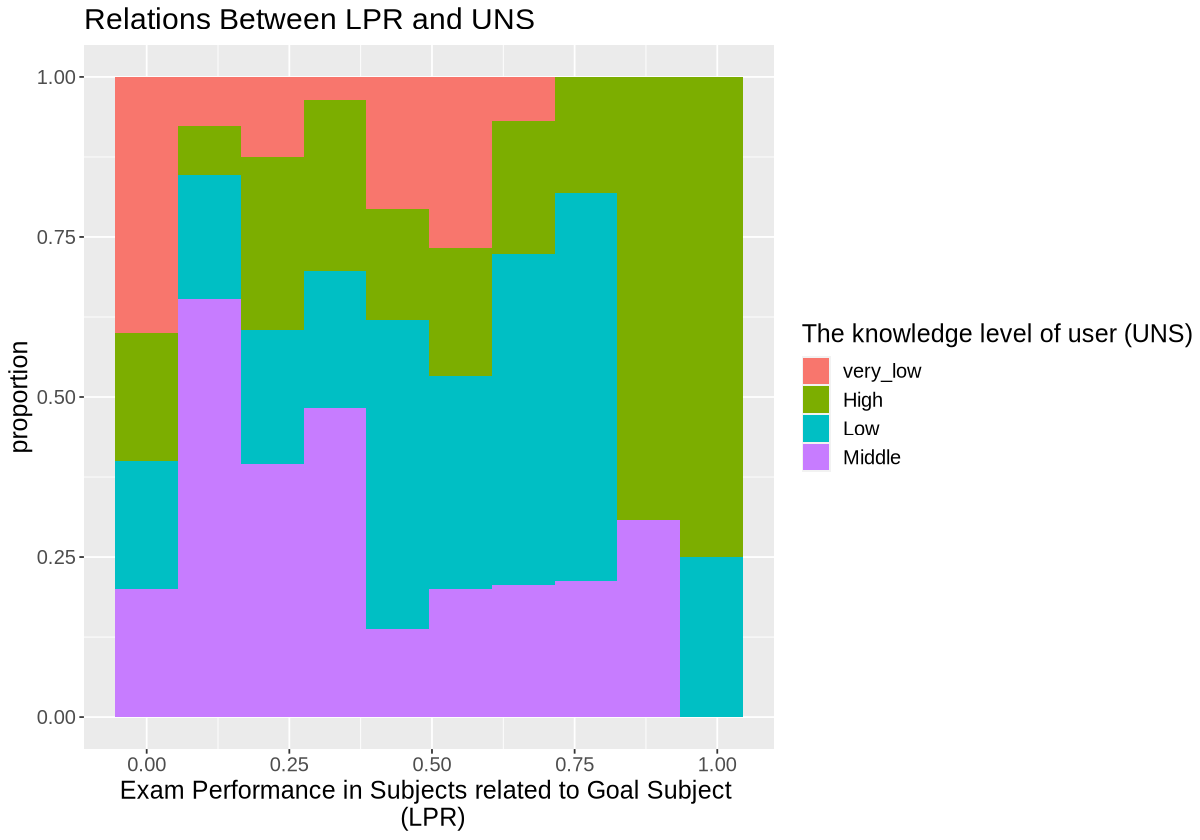

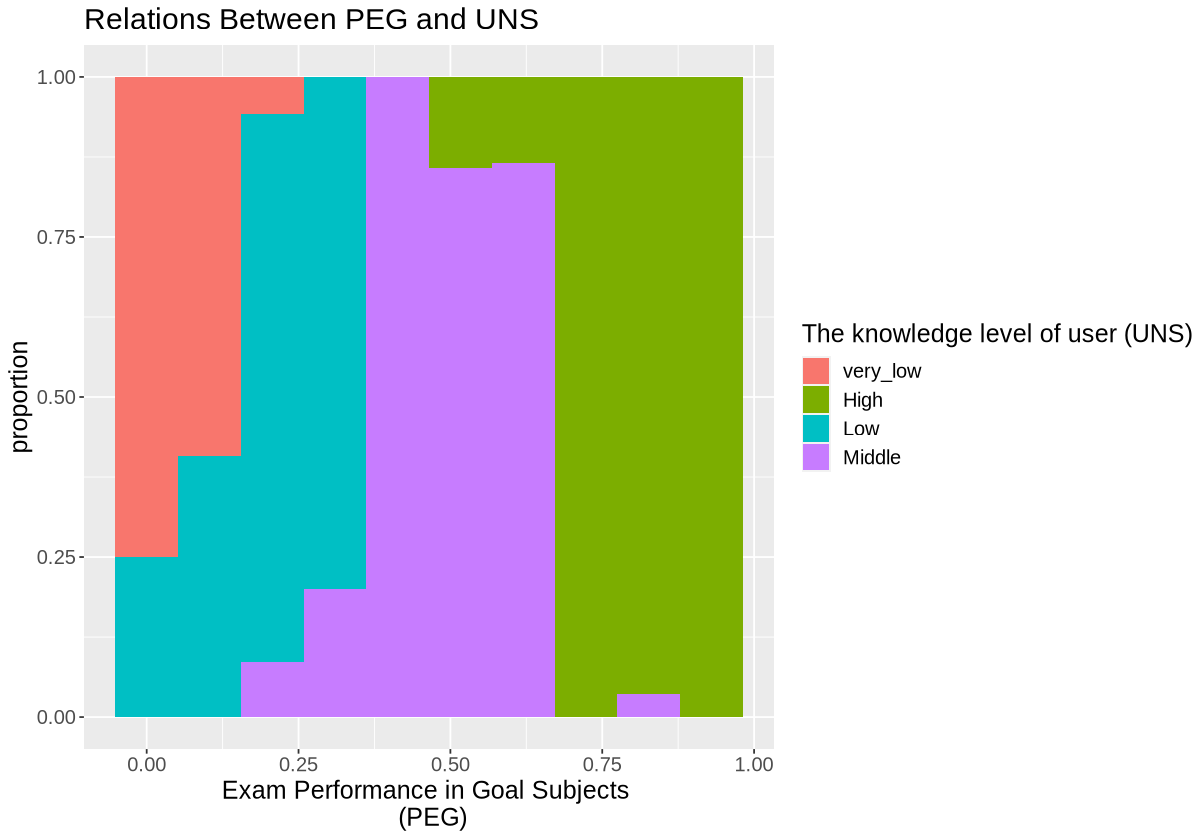

In [6]:
# Use histograms to find the relations between STG, SCG, STR, LPR, PEG and UNS respectively.
plot_STG_UNS<-data_train|>ggplot(aes(x=STG,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between STG and UNS")+
    labs(x="Degree of Time Studying for Goal Subject\n (STG)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_UNS
plot_SCG_UNS<-data_train|>ggplot(aes(x=SCG,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between SCG and UNS")+
    labs(x="Degree of Repetitive Studying for Goal Subjects \n (SCG)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_SCG_UNS

plot_STR_UNS<-data_train|>ggplot(aes(x=STR,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between STR and UNS")+
    labs(x="The Degree of Studying of Materials Related to Goal Subject \n (STR)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STR_UNS

plot_STG_LPR<-data_train|>ggplot(aes(x=LPR,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between LPR and UNS")+
    labs(x="Exam Performance in Subjects related to Goal Subject \n (LPR)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_LPR

plot_PEG_LPR<-data_train|>ggplot(aes(x=PEG,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between PEG and UNS")+
    labs(x="Exam Performance in Goal Subjects \n (PEG)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_PEG_LPR

**<u><h4>Method</u></h4>**

Notes:
* one out of two: STG, SCG
* MUST: PEG should variable predictors for UNS
* Visulaization: scatter plot with coloured UNS
* - one is model predicted
  - one is test data set

We will use the $k$ nearest neighbors’ algorithm to predict the category of UNS, since we are answering our question as a classification question. We will scale columns of STG, SCG, and PEG to predict the UNS of a given point in the test data. We are using STG, SCG, and PEG because as the variables of these columns increases so does a student’s knowledge level. So, we do not want to use STR and LPR since those columns relates to the subject which may not impact the knowledge level of students. We will show our results in two scatterplots, SCG vs. PEG and STG and PEG, with both of them having coloured UNS data points.


**<u><h4>Expected outcomes and significance</u></h4>**
Since students with very low knowledge levels of electric DC machines are likely to fail in this course, we are interested in the very_low category in UNS, and we define very_low as positive. We expect to find all students with very low knowledge levels so we want to find our model has high recall in the "very_low" category. This finding shows that our model can help instructors find students who may have a "very_low" knowledge level. Then, the instructor can help these students.

The future question is how do we use different weight functions to put more weight on PEG since the last histogram and first two scatterplots indicate that PEG plays a majority role in determining UNS.